In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv("user_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df = data.set_index("User ID")

In [6]:
df

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [10]:
X = df.iloc[:, 2:3].values
Y = df.iloc[:, 3].values

# Splitting teh dataset into the Training set and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [11]:
# Feature Scaling
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [15]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001, # minimum amount of change to count as an imporvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True
)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_Train, Y_Train, batch_size = 32, epochs = 500, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 1s 39ms/step - loss: 0.6928 - accuracy: 0.6125 - val_loss: 0.6918 - val_accuracy: 0.7000
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.6125 - val_loss: 0.6904 - val_accuracy: 0.7000
Epoch 3/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6913 - accuracy: 0.6125 - val_loss: 0.6892 - val_accuracy: 0.7000
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.6125 - val_loss: 0.6879 - val_accuracy: 0.7000
Epoch 5/500
8/8 [==============================] - 0s 14ms/step - loss: 0.6900 - accuracy: 0.6125 - val_loss: 0.6867 - val_accuracy: 0.7000
Epoch 6/500
8/8 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 0.6125 - val_loss: 0.6854 - val_accuracy: 0.7000
Epoch 7/500
8/8 [==============================] - 0s 12ms/step - loss: 0.6883 - accuracy: 0.6125 - val_loss: 0.6841 - val_accuracy: 0.7000
Epoch 8/500
8/8 [=====

<Axes: title={'center': 'Accuracy'}>

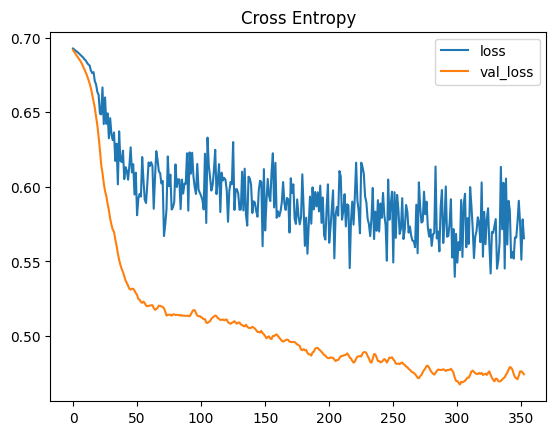

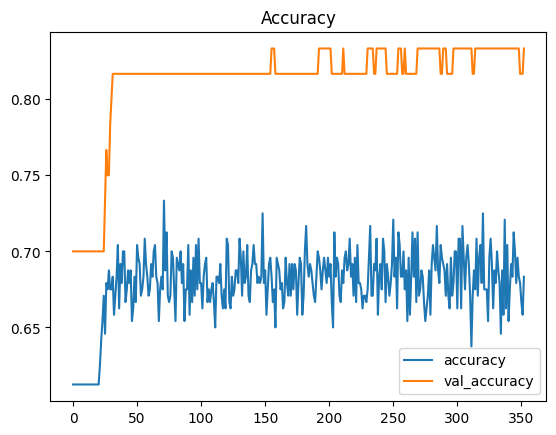

In [19]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross Entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [20]:
# Predicting the test set results
y_pred = model.predict(X_Test)
y_pred = np.where(y_pred > 0.5, 1, 0)

4/4 [==============================] - 0s 5ms/step


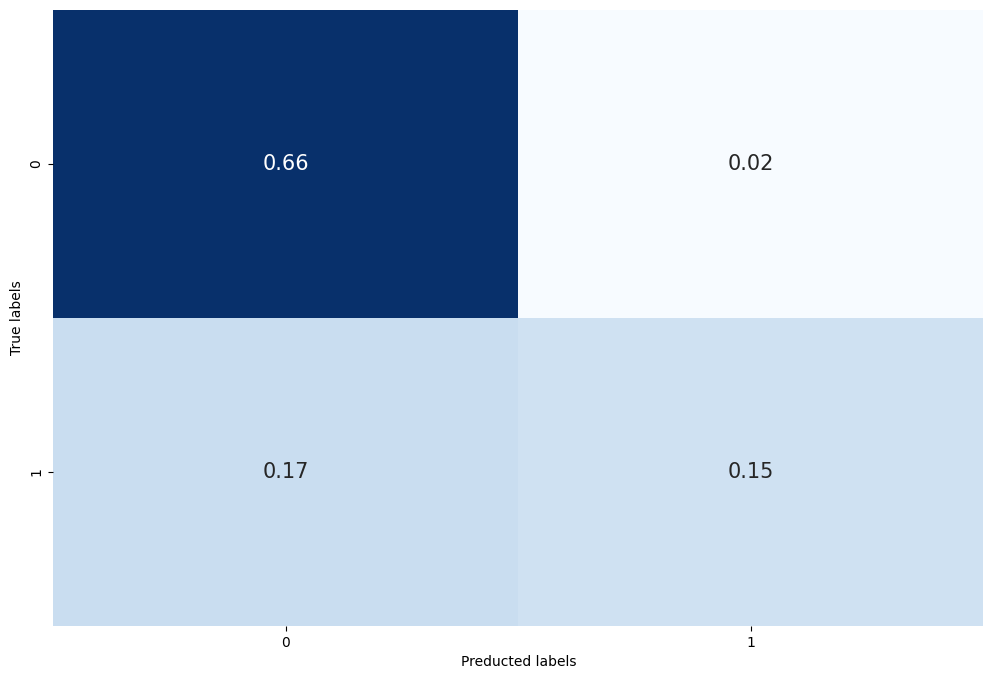

In [24]:
# Generate confusion matrix
cf_matrix = confusion_matrix(Y_Test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={'size': 15})
plt.xlabel('Preducted labels')
plt.ylabel('True labels')
plt.show()

In [25]:
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.87        68
           1       0.88      0.47      0.61        32

    accuracy                           0.81       100
   macro avg       0.84      0.72      0.74       100
weighted avg       0.82      0.81      0.79       100

